In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import seaborn as sns
plt.rcParams['font.size'] = 20

!pip -q install pyswarm
from pyswarm import pso

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

C:\Users\Acc\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Read from path to CSV file
path = 'https://raw.githubusercontent.com/yohanesnuwara/volve-machine-learning/main/Data_for_ROP_optimization.csv'
df = pd.read_csv(path)

df.head()

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF,VSH,SW,KLOGH
0,3305.0,26217.864,1.314720,0.004088,0.086711,0.071719,1.0,0.001
1,3310.0,83492.293,1.328674,0.005159,0.095208,0.116548,1.0,0.001
2,3315.0,97087.882,1.420116,0.005971,0.061636,0.104283,1.0,0.001
3,3320.0,54793.206,1.593931,0.005419,0.043498,0.110040,1.0,0.001
4,3325.0,50301.579,1.653262,0.005435,0.035252,0.120808,1.0,0.001


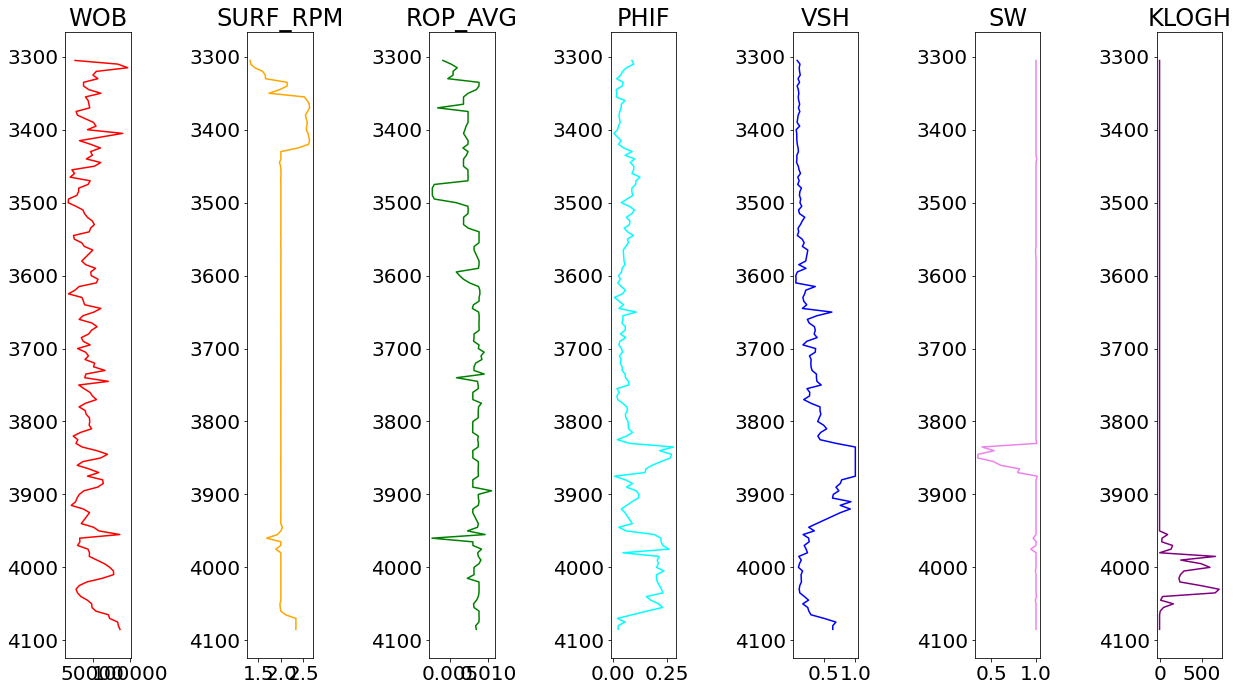

In [11]:
# Display logs
logs = df.columns[1:]
colors = ['red', 'orange', 'green', 'cyan', 'blue', 'violet', 'purple']

plt.figure(figsize=(20,10))
for i in range(len(logs)):
  plt.subplot(1,8,i+1)
  plt.plot(df[logs[i]].values, df.Depth.values, color=colors[i])
  plt.title(logs[i])
  plt.gca().invert_yaxis()

plt.tight_layout()

In [9]:
df.describe()

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF,VSH,SW,KLOGH
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,3697.417219,45393.934391,2.034981,0.007800,0.084423,0.299809,0.975579,37.072228
std,227.169433,15784.246882,0.208492,0.001476,0.068230,0.264596,0.108946,127.186210
min,3305.000000,16961.916000,1.314720,0.002666,0.002968,0.049451,0.351393,-0.001124
25%,3502.500000,34320.946500,1.998711,0.007368,0.037550,0.108539,1.000000,0.001000
50%,3700.000000,44243.480000,1.999697,0.008157,0.059274,0.193100,1.000000,0.001000
75%,3887.500000,53212.685000,2.001069,0.008760,0.097212,0.387664,1.000000,0.001000
max,4085.000000,97087.882000,2.639233,0.010447,0.279346,1.000000,1.013335,709.158935


In [12]:
df.corr()

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF,VSH,SW,KLOGH
Depth,1.000000,0.159770,-0.104547,0.499131,0.521520,0.508014,-0.154379,0.402978
WOB,0.159770,1.000000,0.007013,0.027432,0.033606,0.045963,-0.064150,0.070220
SURF_RPM,-0.104547,0.007013,1.000000,0.073833,-0.230075,-0.063986,0.043447,-0.058486
ROP_AVG,0.499131,0.027432,0.073833,1.000000,0.093381,0.349009,-0.080949,0.149617
PHIF,0.521520,0.033606,-0.230075,0.093381,1.000000,0.208022,-0.501702,0.561610
VSH,0.508014,0.045963,-0.063986,0.349009,0.208022,1.000000,-0.580621,-0.194376
SW,-0.154379,-0.064150,0.043447,-0.080949,-0.501702,-0.580621,1.000000,0.060306
KLOGH,0.402978,0.070220,-0.058486,0.149617,0.561610,-0.194376,0.060306,1.000000


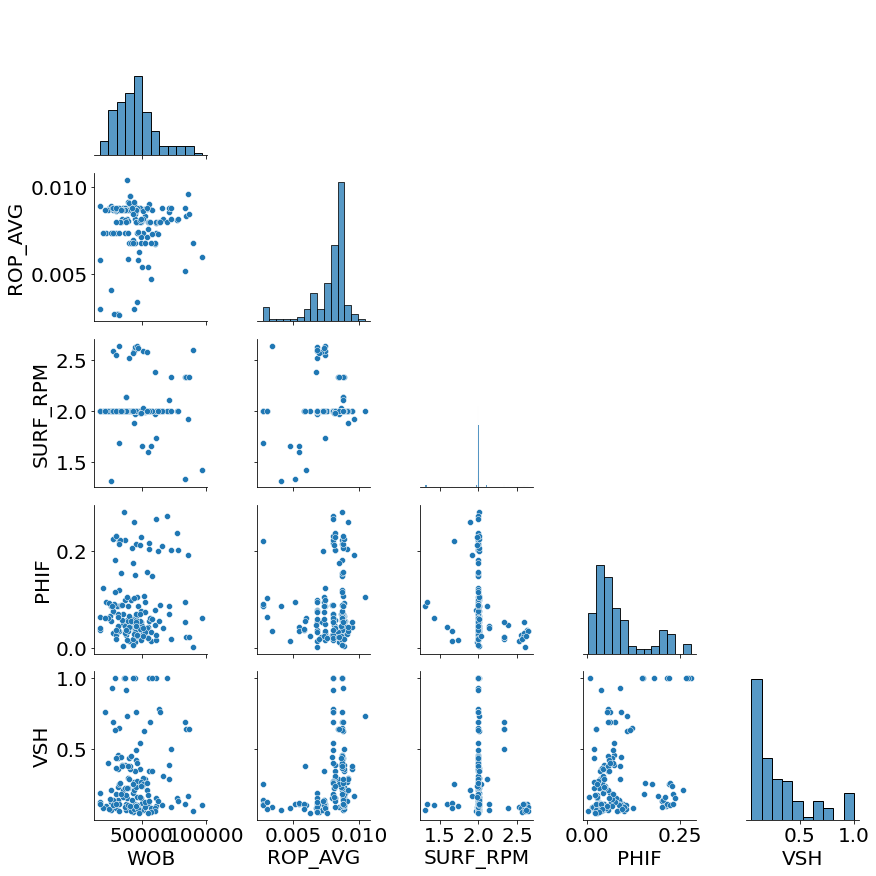

In [13]:
sns.pairplot(df[['WOB', 'ROP_AVG', 'SURF_RPM', 'PHIF', 'VSH']], corner=True)

In [14]:
# Separate feature and target
X = df.drop(['ROP_AVG'], axis=1)
y = df['ROP_AVG']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)

# Make pipeline
steps = [('scaler', StandardScaler()), 
         ('gbr', GradientBoostingRegressor(min_samples_leaf=6, max_depth=20, 
                                           random_state=10))]
pipe = Pipeline(steps)

# Fit pipeline to training data
pipe.fit(X_train,y_train)

# Evaluate model with R2 metric
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
print(f'R2 on train set: {train_score:.2f}')
print(f'R2 on test set: {test_score:.2f}')

R2 on train set: 0.98
R2 on test set: 0.77


In [15]:
def predict(model, Depth, PHIF, VSH, SW, KLOGH, WOB, SURF_RPM):
  # Make a test input
  X_test = np.array([Depth, WOB, SURF_RPM, PHIF, VSH, SW, KLOGH])  
  X_test = X_test.reshape(1,-1)

  # Predict on a test input
  y_pred = model.predict(X_test)
  return y_pred[0]

# Predict on new inputs
predict(pipe, 4000, 0.2, 0.5, 1, 500, WOB=5e4, SURF_RPM=2) 

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.008385100886684715

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names

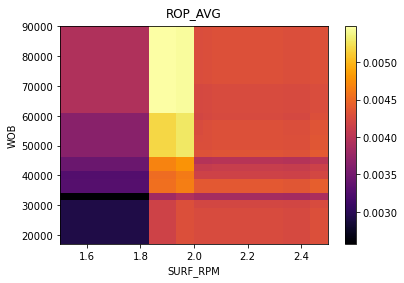

In [17]:
plt.rcParams['font.size'] = 10

def plot_space(model, WOB, SURF_RPM, constant_inputs):
  N_matrix = np.empty((len(WOB), len(SURF_RPM)))
  for i in range(len(WOB)):
    for j in range(len(SURF_RPM)):
      # Unwrap constant variables
      Depth, PHIF, VSH, SW, KLOGH = constant_inputs.values()
      N = predict(model, Depth, PHIF, VSH, SW, KLOGH, WOB=WOB[i], SURF_RPM=SURF_RPM[j])
      N_matrix[i][j] = N  
    
  plt.imshow(N_matrix, origin='lower', aspect='auto', cmap='inferno',
             extent=(min(SURF_RPM), max(SURF_RPM), min(WOB), max(WOB)))  
  plt.xlabel('SURF_RPM')
  plt.ylabel('WOB')
  plt.title('ROP_AVG', pad=10)    
  plt.colorbar()

# Range of WOB and RPM values
WOB = np.linspace(17e3, 90e3, 30)
SURF_RPM = np.linspace(1.5, 2.5, 30)

# Constant input variables
constant_inputs = {'Depth': 3480, 'PHIF': 0.09, 'VSH': 0.1, 
                   'SW': 1, 'KLOGH': 0.001}                   

# Plot prediction space
plot_space(pipe, WOB, SURF_RPM, constant_inputs)

In [18]:
# Data at depth 3480 m
df[df.Depth==3480]

,Depth,WOB,SURF_RPM,ROP_AVG,PHIF,VSH,SW,KLOGH
33,3480.0,31236.811,1.999362,0.00271,0.086571,0.139695,1.0,0.001


In [ ]:
import pyswarm as pso

# Define objective function. "pipe" as model
def f(X):
  return -pipe.predict(X.reshape(1,-1)) # Minus sign to optimize

# Lower bounds of feature variables in the order of X.columns
lb = np.array([3480, 2e4, 1.5, 0.09, 0.1, 1, 0.001])

# Upper bounds of feature variables in the order of X.columns
ub = np.array([3480, 9e4, 2.5, 0.09, 0.1, 1, 0.001])
ub += 1e-10

# Solve optimization
xopt, fopt = pso(f, lb, ub, swarmsize=200, omega=0.3, phip=.5, 
                 phig=0.7, maxiter=1000, minstep=1e-8)

# Print values that causes maximum ROP from xopt
for i in range(len(X.columns)):
  print(f'{X.columns[i]}: {xopt[i]:.2f}')

# Print value of maximum ROP from popt
print(f'Maximum ROP achieved: {-fopt}')